In [1]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
#load the dataset
data=pd.read_csv(r"C:\Users\ishik\Downloads\Data (1).csv")

In [3]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
data.shape

(110527, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay']).dt.date.astype('datetime64[ns]')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [9]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
data['sched_Day']=data['ScheduledDay'].dt.dayofweek
data['app_Day']=data['AppointmentDay'].dt.dayofweek

In [11]:
data['sched_Day'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sched_Day, dtype: int64

In [12]:
data['app_Day'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: app_Day, dtype: int64

In [14]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sched_Day', 'app_Day'],
      dtype='object')

In [17]:
data=data.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','SMS_received':'SMSreceived','No-show':'Noshow'})

In [18]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSreceived', 'Noshow',
       'sched_Day', 'app_Day'],
      dtype='object')

In [19]:
#drop columns not needed
data.drop(['PatientId', 'AppointmentID','Neighbourhood'],axis=1,inplace=True)

In [20]:
data

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Noshow,sched_Day,app_Day
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,1,1
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,1,1
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,2,1
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,2,1


In [21]:
data.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,sched_Day,app_Day
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


Text(0.5, 1.02, 'Count of target variable per category')

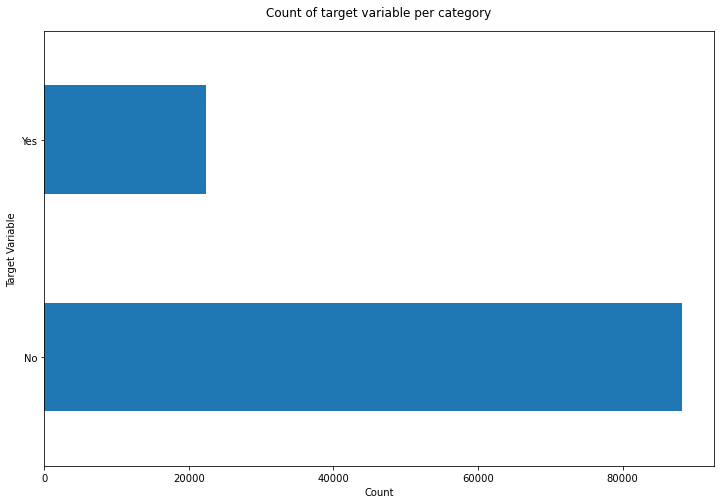

In [22]:
data['Noshow'].value_counts().plot(kind='barh',figsize=(12,8))
plt.xlabel('Count')
plt.ylabel('Target Variable')
plt.title('Count of target variable per category',y=1.02)

In [23]:
100*data['Noshow'].value_counts()/len(data['Noshow'])

No     79.806744
Yes    20.193256
Name: Noshow, dtype: float64

C:\Users\ishik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


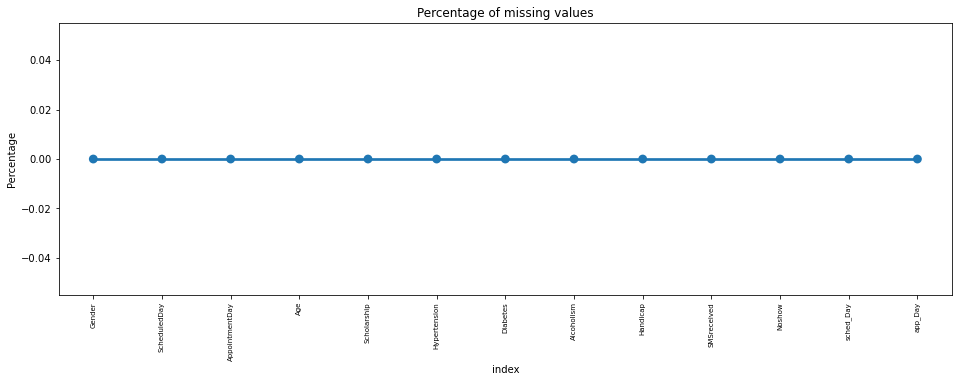

In [24]:
missing= pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title('Percentage of missing values')
plt.ylabel('Percentage')
plt.show()

MISSING DATA


Here we do not have any missing data

In [26]:
print(data['Age'].max())

115


In [27]:
labels=['{0}-{1}'.format(i,i+20) for i in range(1,118,20)]
data['Age_group']=pd.cut(data.Age,range(1,130,20),right=False, labels=labels)

In [29]:
data.drop(['Age'],axis=1,inplace=True)

Data exploration

In [30]:
list(data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSreceived',
 'Noshow',
 'sched_Day',
 'app_Day',
 'Age_group']

In [33]:
data['Noshow']= np.where(data.Noshow=='Yes',1,0)

In [34]:
data.Noshow.value_counts()

0    88208
1    22319
Name: Noshow, dtype: int64

In [35]:
data_dummies=pd.get_dummies(data)
data_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Noshow,sched_Day,app_Day,Gender_F,Gender_M,Age_group_1-21,Age_group_21-41,Age_group_41-61,Age_group_61-81,Age_group_81-101,Age_group_101-121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,0,1,0,0,1,0,0,0
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,1,0,0,0,0,0
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,1,0,0,0,1,0,0,0


Build a correlation of all predictors with 'Noshow'

<AxesSubplot:>

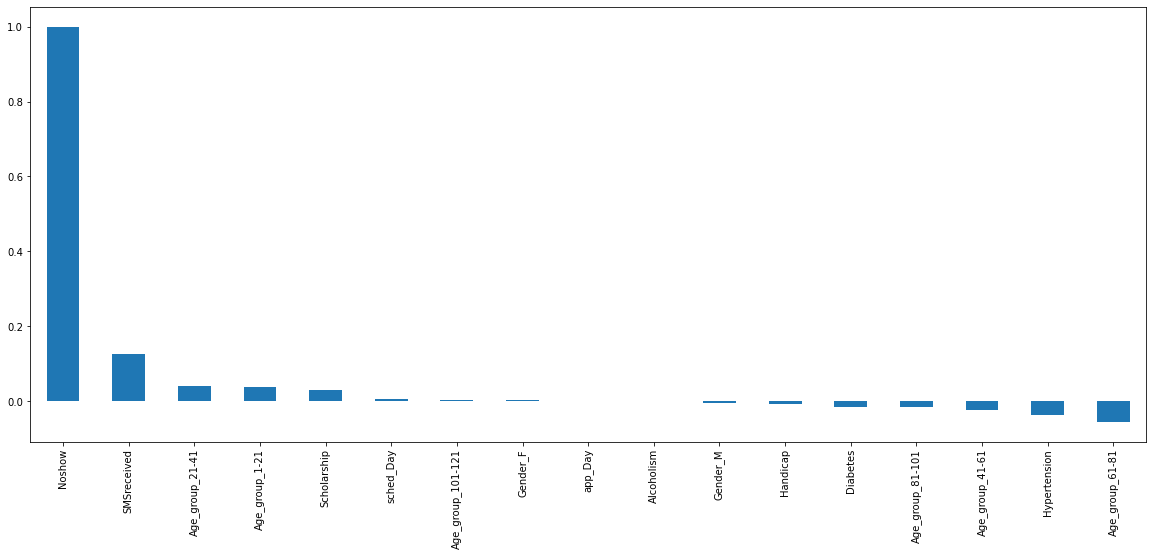

In [36]:
plt.figure(figsize=(20,8))
data_dummies.corr()['Noshow'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

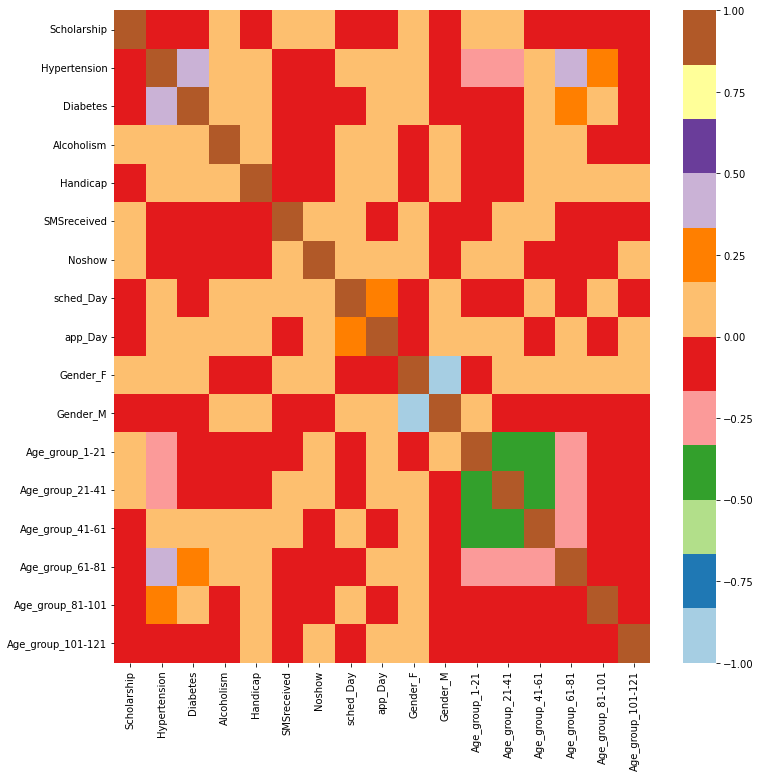

In [37]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dummies.corr(),cmap='Paired')

Bivariate analysis

In [39]:
new_df1_target0=data.loc[data["Noshow"]==0]
new_df1_target1=data.loc[data["Noshow"]==1]

In [40]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

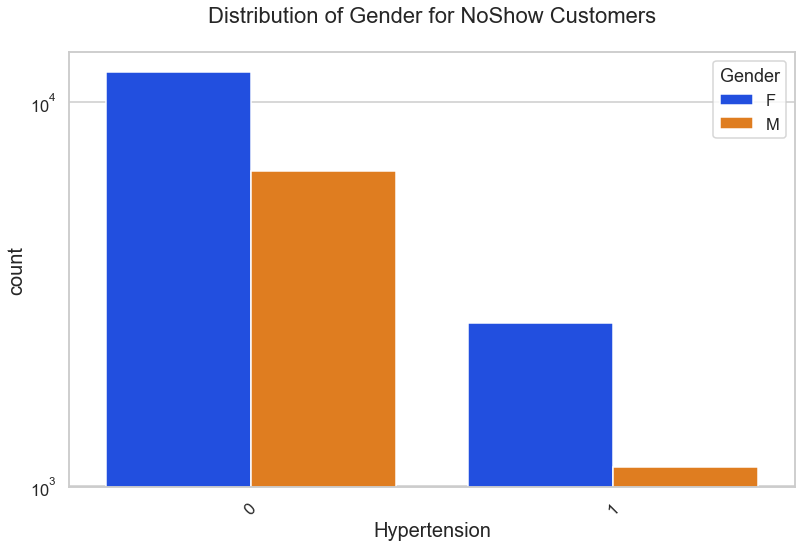

In [41]:
uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

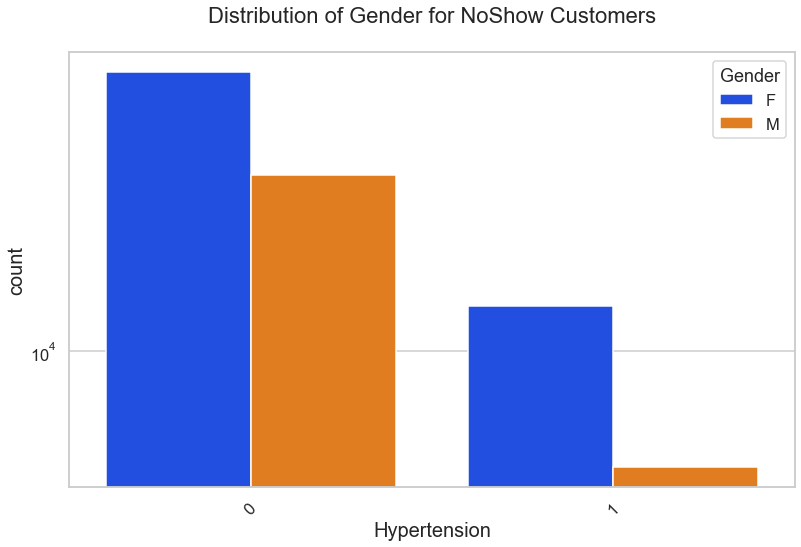

In [42]:
uniplot(new_df1_target0,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')


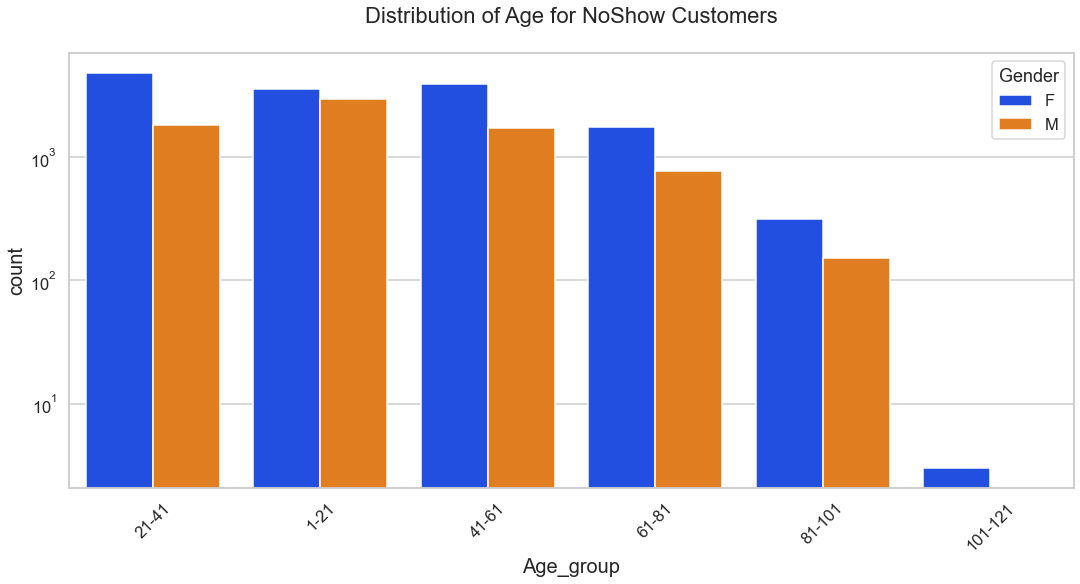

In [43]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')


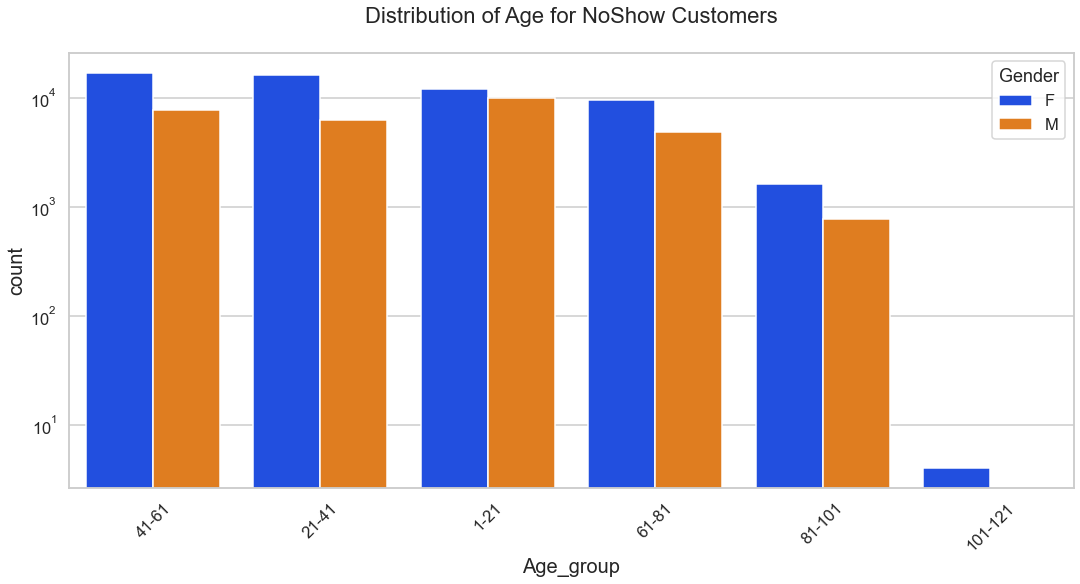

In [44]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')


FINDINGS:

1. Female patients have taken more appointments then male patients
2. Ratio of Nohow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group
3. Each Neighbourhood have almost 80% show rate
4. There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit.
5. there are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.
6. there are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.
7. there are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit.
8. there is no appointments on sunday and on saturday appointments are very less in comparision to other week days